<a href="https://colab.research.google.com/github/giorgospan/Malicious-Website-Detection/blob/main/Spam_Page_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Feature Selection



### Load Spam Pages features from *ISCXURL2016* dataset

In [147]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [148]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile('/content/gdrive/My Drive/di/ISCXURL2016.zip')
X = pd.read_csv(zf.open('FinalDataset/Spam.csv'))

In [149]:
X = X.fillna(0)

In [150]:
X.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,0,0,0,0,0,0,0,0,0,80,12,61,61,2,2,2,0.762500,0.025000,0.166667,0.150000,5.083334,0.032787,0,-1,1,-1,0.750000,-1,10,0,6,2,2,-1,54,11,0,0,39,-1,48,8,8,8,-1,0,0,5,0,7,-1,0.125000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,6,1,-1,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,0,2,2,0,0,0,0,0,0,78,17,54,54,40,4,2,0.692308,0.025641,0.117647,0.217949,3.176471,0.037037,0,-1,3,-1,0.647059,-1,8,0,6,2,0,-1,54,15,0,31,4,-1,40,10,8,7,-1,0,0,4,0,8,-1,0.102564,0.0,0.666667,0.044444,0.000000,-1.000000,7,2,2,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,0,0,0,0,0,0,0,0,0,71,9,54,54,2,2,7,0.760563,0.098592,0.777778,0.126761,6.000000,0.129630,0,-1,1,-1,0.666667,2,0,0,0,0,0,0,57,8,19,19,6,2,22,5,7,7,2,0,1,6,0,3,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8,1,4,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,0,0,0,0,0,0,0,0,0,64,10,47,47,2,2,2,0.734375,0.031250,0.200000,0.156250,4.700000,0.042553,0,-1,1,-1,0.800000,-1,0,0,0,0,0,-1,53,9,5,5,30,-1,33,7,11,7,-1,0,0,4,0,3,-1,0.000000,0.0,0.000000,0.000000,0.000000,-1.000000,5,1,2,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,0,0,0,0,0,0,0,0,0,68,13,48,48,2,2,35,0.705882,0.514706,2.692308,0.191176,3.692308,0.729167,0,-1,2,-1,0.769231,13,6,0,0,0,6,6,48,12,3,3,26,12,39,9,7,7,13,0,2,3,0,4,3,0.088235,0.0,0.000000,0.139535,0.153846,0.171429,9,1,1,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


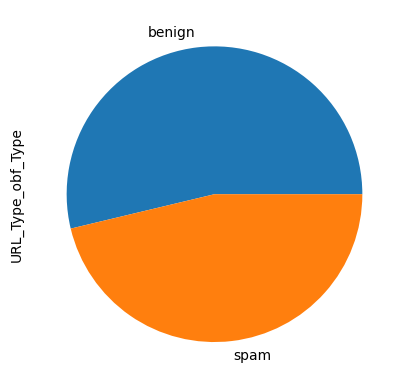

In [151]:
labels = X['URL_Type_obf_Type']

labels.value_counts().plot(kind='pie')

In [152]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(X['URL_Type_obf_Type'])

In [153]:
X = X.drop(['URL_Type_obf_Type'], axis=1)

X.shape

(14479, 79)

### Detect highly correlated features

In [154]:
test_size = 0.95
seed = 42

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [156]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [157]:
cf = correlatedFeatures(X_train, 0.85)
cf

{'ArgLen',
 'Domain_LongestWordLength',
 'Entropy_Afterpath',
 'Extension_DigitCount',
 'Extension_LetterCount',
 'LongestPathTokenLength',
 'LongestVariableValue',
 'NumberRate_Domain',
 'Query_DigitCount',
 'Query_LetterCount',
 'SymbolCount_Afterpath',
 'SymbolCount_Domain',
 'SymbolCount_Extension',
 'URL_DigitCount',
 'URL_Letter_Count',
 'argDomanRatio',
 'argPathRatio',
 'charcompace',
 'delimeter_Count',
 'dld_filename',
 'dld_getArg',
 'dld_path',
 'domainUrlRatio',
 'host_letter_count',
 'ldl_getArg',
 'ldl_path',
 'ldl_url',
 'longdomaintokenlen',
 'pathDomainRatio',
 'pathLength',
 'sub-Directory_LongestWordLength',
 'subDirLen',
 'tld',
 'urlLen'}

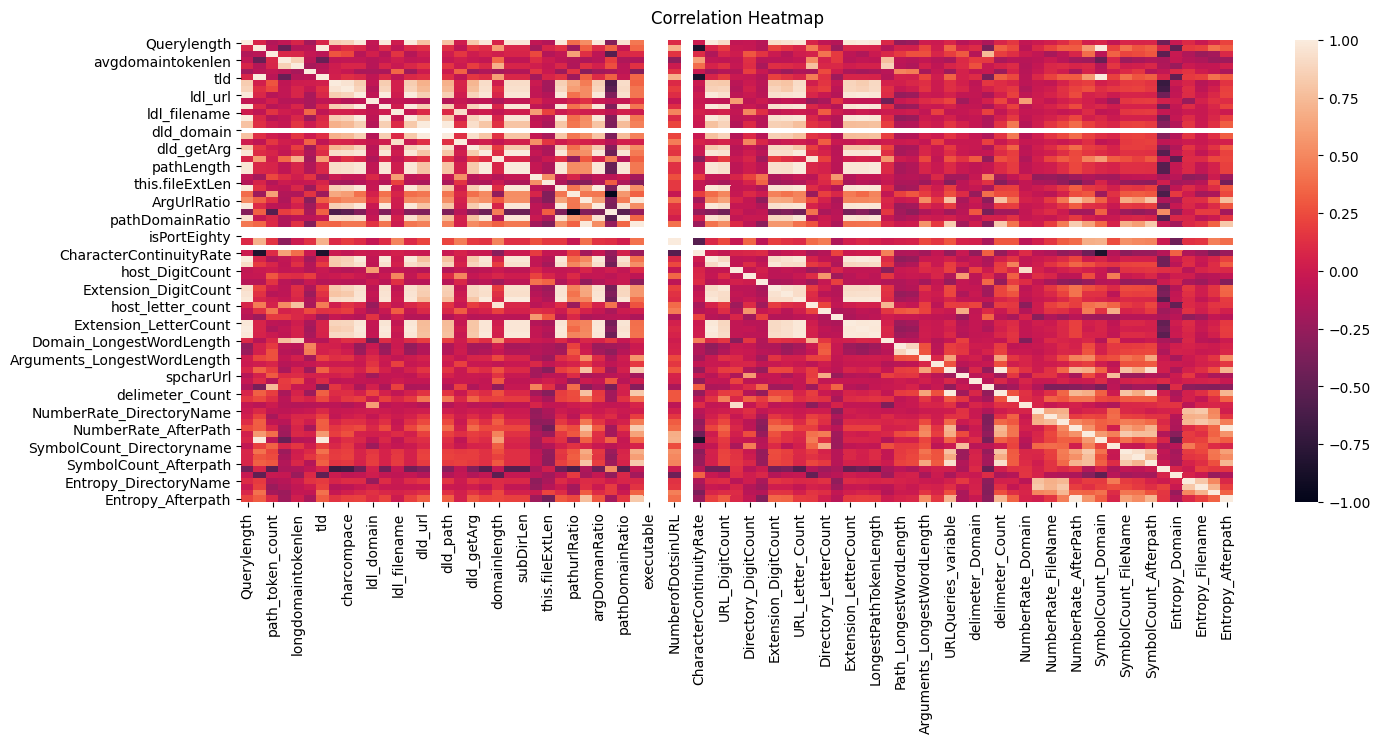

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sns.heatmap(X_train.corr());

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Identify the K-Best features

In [159]:
K_ = 25

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [161]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(score_func=f_classif, k=K_)
kbest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [15 32 33 35] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=25, score_func=<function f_classif at 0x7fbdc54eba70>)

range(0, 79)


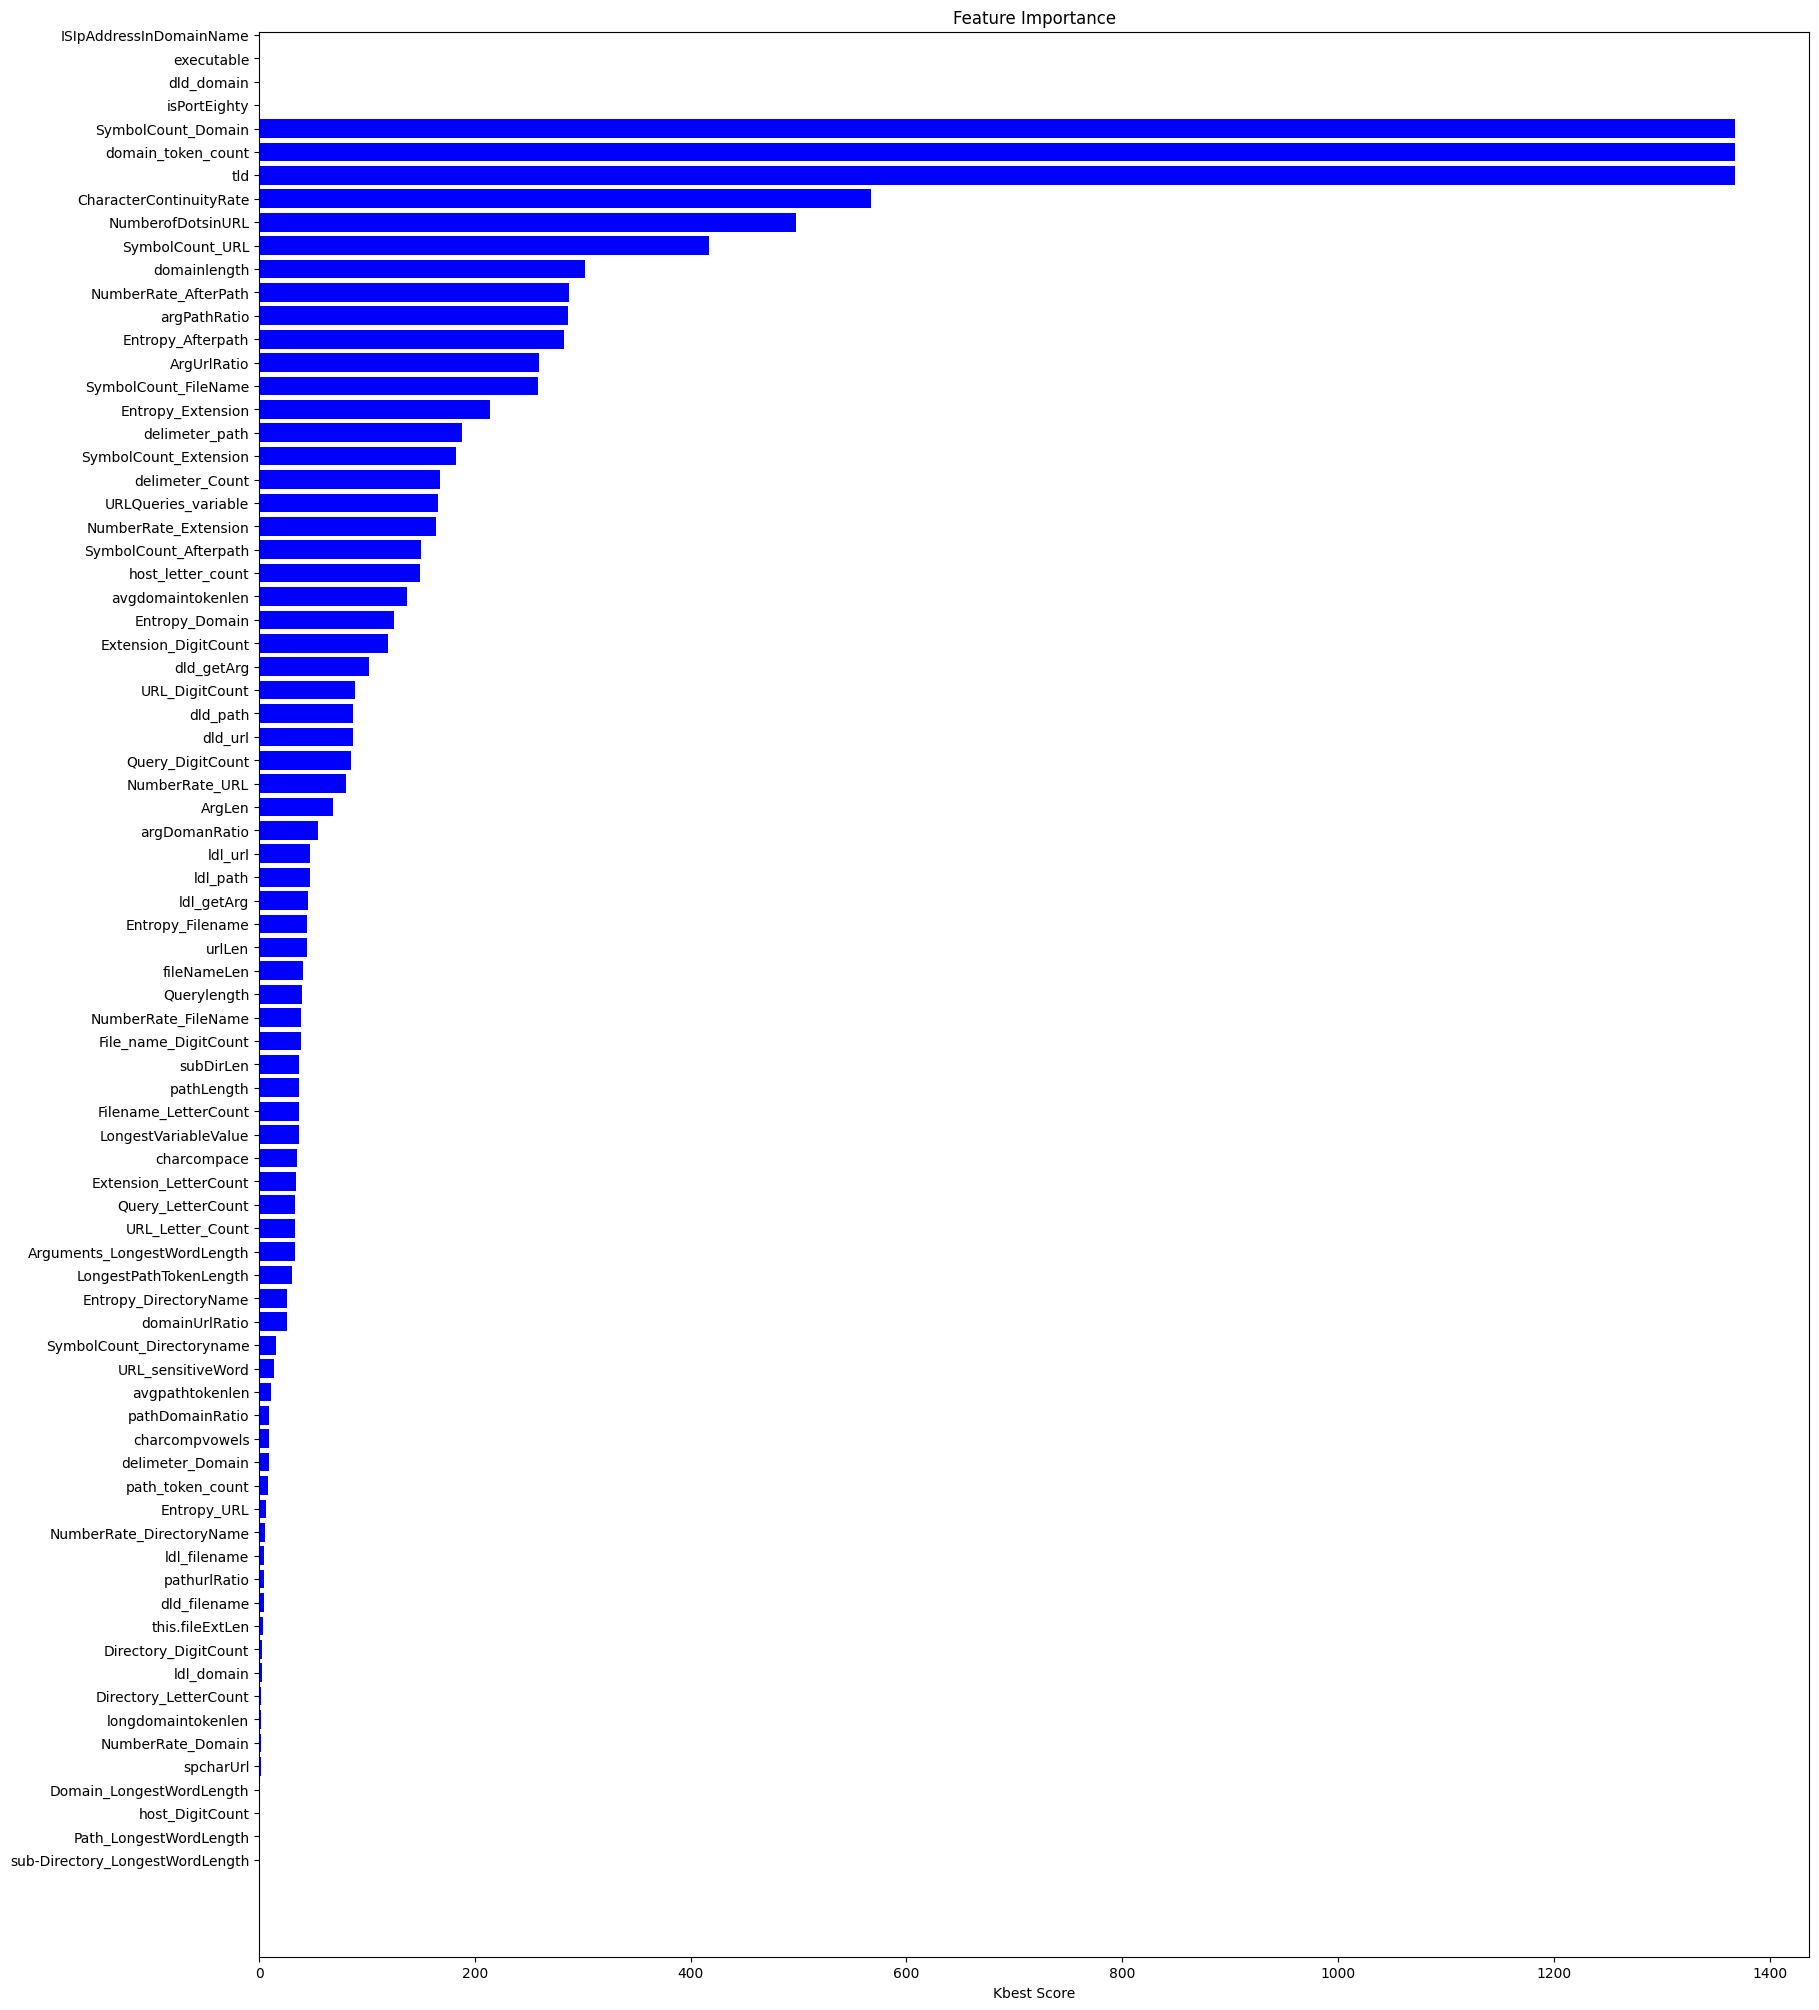

In [162]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

features = X_train.columns
vars_ = kbest.scores_
indices = np.argsort(vars_)

print(range(len(indices)))
plt.figure(figsize=(20,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), vars_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Kbest Score')
plt.show()

In [163]:
low_score = set(X.columns[~kbest.get_support()])
print("Removed features:", low_score)

Removed features: {'subDirLen', 'LongestVariableValue', 'Entropy_URL', 'Extension_LetterCount', 'Directory_LetterCount', 'URL_sensitiveWord', 'pathDomainRatio', 'dld_domain', 'Querylength', 'domainUrlRatio', 'URL_Letter_Count', 'dld_path', 'Filename_LetterCount', 'Entropy_DirectoryName', 'Arguments_LongestWordLength', 'Query_DigitCount', 'NumberRate_URL', 'pathurlRatio', 'fileNameLen', 'pathLength', 'host_DigitCount', 'this.fileExtLen', 'dld_filename', 'path_token_count', 'Query_LetterCount', 'ISIpAddressInDomainName', 'SymbolCount_Directoryname', 'charcompace', 'ldl_domain', 'File_name_DigitCount', 'spcharUrl', 'urlLen', 'NumberRate_DirectoryName', 'ldl_filename', 'NumberRate_Domain', 'isPortEighty', 'charcompvowels', 'dld_url', 'NumberRate_FileName', 'longdomaintokenlen', 'ldl_url', 'argDomanRatio', 'LongestPathTokenLength', 'ldl_getArg', 'ArgLen', 'Path_LongestWordLength', 'ldl_path', 'Domain_LongestWordLength', 'sub-Directory_LongestWordLength', 'Entropy_Filename', 'avgpathtokenlen

In [164]:
to_remove = set.union(cf, low_score)

to_remove

{'ArgLen',
 'Arguments_LongestWordLength',
 'Directory_DigitCount',
 'Directory_LetterCount',
 'Domain_LongestWordLength',
 'Entropy_Afterpath',
 'Entropy_DirectoryName',
 'Entropy_Filename',
 'Entropy_URL',
 'Extension_DigitCount',
 'Extension_LetterCount',
 'File_name_DigitCount',
 'Filename_LetterCount',
 'ISIpAddressInDomainName',
 'LongestPathTokenLength',
 'LongestVariableValue',
 'NumberRate_DirectoryName',
 'NumberRate_Domain',
 'NumberRate_FileName',
 'NumberRate_URL',
 'Path_LongestWordLength',
 'Query_DigitCount',
 'Query_LetterCount',
 'Querylength',
 'SymbolCount_Afterpath',
 'SymbolCount_Directoryname',
 'SymbolCount_Domain',
 'SymbolCount_Extension',
 'URL_DigitCount',
 'URL_Letter_Count',
 'URL_sensitiveWord',
 'argDomanRatio',
 'argPathRatio',
 'avgpathtokenlen',
 'charcompace',
 'charcompvowels',
 'delimeter_Count',
 'delimeter_Domain',
 'dld_domain',
 'dld_filename',
 'dld_getArg',
 'dld_path',
 'dld_url',
 'domainUrlRatio',
 'executable',
 'fileNameLen',
 'host_Digi

In [165]:
# Remove the correlated features
X_train = X_train.drop(to_remove, axis=1)
X_test = X_test.drop(to_remove, axis=1)

In [166]:
print(X_train.shape)
print(X_test.shape)

(723, 14)
(13756, 14)


In [167]:
features = X_train.columns

features

Index(['domain_token_count', 'avgdomaintokenlen', 'domainlength',
       'ArgUrlRatio', 'NumberofDotsinURL', 'CharacterContinuityRate',
       'URLQueries_variable', 'delimeter_path', 'NumberRate_Extension',
       'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_FileName',
       'Entropy_Domain', 'Entropy_Extension'],
      dtype='object')

# Part 2: Classifier Selection


In [168]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [169]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.990
	Precision: 0.988
	Recall: 0.992
	F1: 0.990



In [170]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [171]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.981
	Precision: 0.973
	Recall: 0.986
	F1: 0.979



In [172]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [173]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.979
	Precision: 0.969
	Recall: 0.987
	F1: 0.978



In [174]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [175]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.979
	Precision: 0.985
	Recall: 0.969
	F1: 0.977



In [176]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [177]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.948
	Precision: 0.903
	Recall: 0.995
	F1: 0.947



In [178]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [179]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.982
	Precision: 0.976
	Recall: 0.986
	F1: 0.981



In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [181]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.987
	Precision: 0.985
	Recall: 0.986
	F1: 0.986



In [182]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter = 10000)), ('rf', RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)), ('gnb', GaussianNB())], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [183]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)
from sklearn import metrics 

print("\tAccuracy: %1.3f" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.984
	Precision: 0.973
	Recall: 0.993
	F1: 0.983



#### K-Fold CV

In [184]:
def get_model(classifier):
  if classifier == 'random-forest':
    model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
  elif classifier == 'svc':
    model = LinearSVC(random_state=0, tol=1e-5)
  elif classifier == 'logisticreg':
    model = LogisticRegression(max_iter = 10000)
  elif classifier == 'knn':
    model = KNeighborsClassifier(n_neighbors=2)
  elif classifier == 'naive-bayes':
    model = GaussianNB()
  elif classifier == 'decision-tree':
    model = DecisionTreeClassifier(random_state=0)
  elif classifier == 'bagging-dtree':
    model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0))
  elif classifier == 'voting':
    model = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter = 10000)), ('rf', RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)), ('gnb', GaussianNB())], voting='hard')
  else:
    model = None
  return model

In [185]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

classifiers = ['random-forest', 'svc', 'logisticreg', 'knn', 'naive-bayes', 'decision-tree', 'bagging-dtree', 'voting']
scoring = ['f1_macro']

scores = {}
for clf in classifiers:
  model = get_model(clf)
  scores[clf] = cross_validate(model, X_train, y_train, scoring=scoring,cv=10)
  sorted(scores[clf].keys())

scores

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

{'bagging-dtree': {'fit_time': array([0.01985979, 0.01886559, 0.01852751, 0.01853323, 0.01869178,
         0.01816678, 0.01827788, 0.01877189, 0.01995587, 0.01827574]),
  'score_time': array([0.00238729, 0.0022068 , 0.00206518, 0.00227332, 0.0021286 ,
         0.00218701, 0.00226068, 0.00326991, 0.0023315 , 0.00221372]),
  'test_f1_macro': array([0.97217988, 0.9724736 , 0.98613485, 1.        , 1.        ,
         0.95813142, 0.98597858, 0.98589065, 0.98589065, 0.98589065])},
 'decision-tree': {'fit_time': array([0.00224161, 0.00232673, 0.00230742, 0.00224209, 0.00238752,
         0.00230908, 0.00248551, 0.00240731, 0.00243425, 0.00229406]),
  'score_time': array([0.00109577, 0.00111604, 0.00110531, 0.00138783, 0.00110269,
         0.00109649, 0.00113964, 0.00108933, 0.00113273, 0.00105286]),
  'test_f1_macro': array([0.97217988, 0.9724736 , 0.98613485, 1.        , 1.        ,
         0.97202797, 0.97202797, 1.        , 1.        , 0.98589065])},
 'knn': {'fit_time': array([0.00186563

In [186]:
f1_scores = {}
for x in classifiers:
  f1_scores[x] = scores[x].get('test_f1_macro')

f1_scores

{'bagging-dtree': array([0.97217988, 0.9724736 , 0.98613485, 1.        , 1.        ,
        0.95813142, 0.98597858, 0.98589065, 0.98589065, 0.98589065]),
 'decision-tree': array([0.97217988, 0.9724736 , 0.98613485, 1.        , 1.        ,
        0.97202797, 0.97202797, 1.        , 1.        , 0.98589065]),
 'knn': array([0.95840456, 0.94469697, 1.        , 0.98589065, 0.98597858,
        0.971875  , 0.98597858, 0.98597858, 0.971875  , 0.98589065]),
 'logisticreg': array([0.97234848, 0.9724736 , 1.        , 0.98597858, 1.        ,
        0.95813142, 0.97202797, 1.        , 1.        , 1.        ]),
 'naive-bayes': array([0.93130058, 0.94511278, 0.94511278, 0.90275902, 0.97202797,
        0.95813142, 0.88888889, 0.97202797, 0.971875  , 0.98597858]),
 'random-forest': array([0.98613485, 0.9724736 , 1.        , 1.        , 1.        ,
        0.98597858, 1.        , 1.        , 0.98589065, 1.        ]),
 'svc': array([0.9586246 , 0.9724736 , 1.        , 0.98597858, 1.        ,
        0

# Part 3: Feature Extraction

### Load test dataset from *ISCXURL2016* dataset

In [187]:
import pandas as pd
import zipfile

cols = ['URL']

zf = zipfile.ZipFile('/content/gdrive/My Drive/di/ISCXURL2016.zip')

Spam = pd.read_csv(zf.open('FinalDataset/URL/spam_dataset.csv'), header=None)
Spam.columns = cols
Spam['label'] = 'spam'

Benign = pd.read_csv(zf.open('FinalDataset/URL/Benign_list_big_final.csv'), header=None)
Benign.columns = cols
Benign['label'] = 'benign'

In [188]:
X_ = Benign.append(Spam)
X_.shape

(47378, 2)

In [189]:
X_.head()

,URL,label
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign


### Extract Features from test dataset

In [190]:
from string import punctuation

SYMBOLS = '{}()[],:;+*|<>~$@$%^`%!'
# SYMBOLS = set(punctuation)
DIGITS = '1234567890'

def conseq_digits(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch in DIGITS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def conseq_chars(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch not in DIGITS and ch not in SYMBOLS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def conseq_symbols(token):
  max_occ = [0]
  curr = 0
  for ch in token:
    if ch in SYMBOLS:
      curr+=1
    else:
      max_occ.append(curr)
      curr = 0
  return max(max_occ)

def char_continuity_rate(url, len):
  return ((conseq_digits(url) + conseq_symbols(url) + conseq_chars(url)) / len)

In [191]:
def count_symbols(token):
  if len(token) == 0:
    return -1

  s = 0
  for ch in token:
    if ch in SYMBOLS:
      s+=1
  return s

def count_digits(token):
  s = 0
  for ch in token:
    if ch in DIGITS:
      s+=1
  return s

In [192]:
# from urllib.parse import urlparse

def get_params_len(query):
  len_ = 0
  # query_string = urlparse.urlparse(url) 
  for param in query:  
    len_ += len(param)
  return len_

def get_ext(url):
    """Return the filename extension from url, or ''."""
    parsed = urlparse(url)
    root, ext = splitext(parsed.path)
    return ext  # or ext[1:] if you don't want the leading '.'

In [193]:
import math
from __future__ import division
from collections import Counter
import math

# entropy calculation of a string
def shannon(string):
  "Calculates the Shannon entropy of a string"
  if len(string) == 0:
    return -1
  # get probability of chars in string
  prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

  # calculate the entropy
  entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

  return entropy

In [194]:
from urllib.parse import urlparse, urlsplit, unquote
from urllib import parse
import os
import re
from os.path import splitext

X_['domain'] = [urlparse(x).netloc for x in X_['URL']]
X_['path'] = [urlparse(x).path for x in X_['URL']]
X_['params'] = [urlparse(x).params for x in X_['URL']]
X_['query'] = [urlparse(x).query for x in X_['URL']]
X_['fragment'] = [urlparse(x).fragment for x in X_['URL']]
X_['filename'] = [os.path.splitext(path)[0] for path in X_['path']]
X_['extension'] = [os.path.splitext(path)[1] for path in X_['path']]

X_['domainlength'] = [len(domain) for domain in X_['domain']]
X_['domain_tokens'] = [re.split('\W+',domain) for domain in X_['domain']]
X_['domain_token_count'] = [len(tok) for tok in X_['domain_tokens']]
X_['avgdomaintokenlen'] = [-1 if y == 0 else len(''.join(x)) / y for x, y in zip(X_['domain_tokens'], X_['domain_token_count'])]
X_['NumberofDotsinURL'] = X_['URL'].str.count('\.')
X_['Entropy_Domain'] = [shannon(domain) for domain in X_['domain']]
X_['URLQueries_variable'] = [len(query) for query in X_['query']]
X_['ArgUrlRatio'] = [-1 if len(url) == 0 else len(args)/len(url) for url, args in zip(X_['URL'], X_['query'])]
X_['CharacterContinuityRate'] = [-1 if len == 0 else char_continuity_rate(url,len) for url, len in zip(X_['domain'], X_['domainlength'])] #maybe this
X_['delimeter_path'] = [path.count('-') + path.count('.') + path.count('_') + path.count('/') for path in X_['path']] #not sure
X_['SymbolCount_URL'] = [count_symbols(url) for url in X_['URL']] #maybe this
X_['SymbolCount_FileName'] = [count_symbols(filename) for filename in X_['filename']] #maybe this
X_['NumberRate_Extension'] = [-1 if len(ext) == 0 else conseq_digits(ext)/len(url) for ext, url in zip(X_['extension'], X_['URL'])]

X_['Entropy_Extension'] = [shannon(ext) for ext in X_['extension']]
X_['NumberRate_AfterPath'] = [-1 if len(ext) == 0 else conseq_digits(ext)/len(url) for ext, url in zip(X_['query'], X_['URL'])]

X_.head(10)

,URL,label,domain,path,params,query,fragment,filename,extension,domainlength,domain_tokens,domain_token_count,avgdomaintokenlen,NumberofDotsinURL,Entropy_Domain,URLQueries_variable,ArgUrlRatio,CharacterContinuityRate,delimeter_path,SymbolCount_URL,SymbolCount_FileName,NumberRate_Extension,Entropy_Extension,NumberRate_AfterPath
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,1337x.to,/torrent/1048648/American-Sniper-2014-MD-iTALi...,,,,/torrent/1048648/American-Sniper-2014-MD-iTALi...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,12,1,0,-1.0,-1.000000,-1.0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,1337x.to,/torrent/1110018/Blackhat-2015-RUSSIAN-720p-WE...,,,,/torrent/1110018/Blackhat-2015-RUSSIAN-720p-WE...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,13,1,0,-1.0,-1.000000,-1.0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,1337x.to,/torrent/1122940/Blackhat-2015-x264-1080p-WEB-...,,,,/torrent/1122940/Blackhat-2015-x264-1080p-WEB-...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,13,1,0,-1.0,-1.000000,-1.0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,1337x.to,/torrent/1124395/Fast-and-Furious-7-2015-HD-TS...,,,,/torrent/1124395/Fast-and-Furious-7-2015-HD-TS...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,15,1,0,-1.0,-1.000000,-1.0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,1337x.to,/torrent/1145504/Avengers-Age-of-Ultron-2015-C...,,,,/torrent/1145504/Avengers-Age-of-Ultron-2015-C...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,13,1,0,-1.0,-1.000000,-1.0
5,http://1337x.to/torrent/1160078/Avengers-age-o...,benign,1337x.to,/torrent/1160078/Avengers-age-of-Ultron-2015-H...,,,,/torrent/1160078/Avengers-age-of-Ultron-2015-H...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,13,1,0,-1.0,-1.000000,-1.0
6,http://1337x.to/torrent/294349/American-Idol-S...,benign,1337x.to,/torrent/294349/American-Idol-S11E04-Auditions...,,,,/torrent/294349/American-Idol-S11E04-Auditions...,,8,"[1337x, to]",2,3.500000,1,2.750000,0,0.000000,0.500000,12,1,0,-1.0,-1.000000,-1.0
7,http://189.cn/dqmh/userCenter/myOrderInfoList....,benign,189.cn,/dqmh/userCenter/myOrderInfoList.do,,method=listMyOrderInfo_new&isVs=no,,/dqmh/userCenter/myOrderInfoList,.do,6,"[189, cn]",2,2.500000,2,2.584963,34,0.409639,0.500000,4,1,0,0.0,1.584963,0.0
8,http://2gis.ru/moscow/search/%D0%9F%D0%BE%D0%B...,benign,2gis.ru,/moscow/search/%D0%9F%D0%BE%D0%B5%D1%81%D1%82%...,,,,/moscow/search/%D0%9F%D0%BE%D0%B5%D1%81%D1%82%...,,7,"[2gis, ru]",2,3.000000,1,2.807355,0,0.000000,0.142857,7,13,12,-1.0,-1.000000,-1.0
9,http://abc.go.com/shows/general-hospital/episo...,benign,abc.go.com,/shows/general-hospital/episode-guide/2015-05/...,,,,/shows/general-hospital/episode-guide/2015-05/...,,10,"[abc, go, com]",3,2.666667,2,2.721928,0,0.000000,0.000000,12,1,0,-1.0,-1.000000,-1.0


In [195]:
from sklearn.preprocessing import LabelEncoder

# Remove extra features
y_ = LabelEncoder().fit_transform(X_['label'])
X_ = X_[['domainlength', 'domain_token_count', 'avgdomaintokenlen', 'Entropy_Domain', 'NumberofDotsinURL', 'URLQueries_variable', 'ArgUrlRatio', 'delimeter_path', 'SymbolCount_URL', 'SymbolCount_FileName', 'CharacterContinuityRate', 'NumberRate_Extension', 'Entropy_Extension', 'NumberRate_AfterPath']]

X_.shape

(47378, 14)

In [196]:
X_.head(10)

,domainlength,domain_token_count,avgdomaintokenlen,Entropy_Domain,NumberofDotsinURL,URLQueries_variable,ArgUrlRatio,delimeter_path,SymbolCount_URL,SymbolCount_FileName,CharacterContinuityRate,NumberRate_Extension,Entropy_Extension,NumberRate_AfterPath
0,8,2,3.500000,2.750000,1,0,0.000000,12,1,0,0.500000,-1.0,-1.000000,-1.0
1,8,2,3.500000,2.750000,1,0,0.000000,13,1,0,0.500000,-1.0,-1.000000,-1.0
2,8,2,3.500000,2.750000,1,0,0.000000,13,1,0,0.500000,-1.0,-1.000000,-1.0
3,8,2,3.500000,2.750000,1,0,0.000000,15,1,0,0.500000,-1.0,-1.000000,-1.0
4,8,2,3.500000,2.750000,1,0,0.000000,13,1,0,0.500000,-1.0,-1.000000,-1.0
5,8,2,3.500000,2.750000,1,0,0.000000,13,1,0,0.500000,-1.0,-1.000000,-1.0
6,8,2,3.500000,2.750000,1,0,0.000000,12,1,0,0.500000,-1.0,-1.000000,-1.0
7,6,2,2.500000,2.584963,2,34,0.409639,4,1,0,0.500000,0.0,1.584963,0.0
8,7,2,3.000000,2.807355,1,0,0.000000,7,13,12,0.142857,-1.0,-1.000000,-1.0
9,10,3,2.666667,2.721928,2,0,0.000000,12,1,0,0.000000,-1.0,-1.000000,-1.0


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, accuracy_score)

X = X[['domainlength', 'domain_token_count', 'avgdomaintokenlen', 'Entropy_Domain', 'NumberofDotsinURL', 'URLQueries_variable', 'ArgUrlRatio', 'delimeter_path', 'SymbolCount_URL', 'SymbolCount_FileName', 'CharacterContinuityRate', 'NumberRate_Extension', 'Entropy_Extension', 'NumberRate_AfterPath']]

X.shape

(14479, 14)

In [198]:
X.head()

,domainlength,domain_token_count,avgdomaintokenlen,Entropy_Domain,NumberofDotsinURL,URLQueries_variable,ArgUrlRatio,delimeter_path,SymbolCount_URL,SymbolCount_FileName,CharacterContinuityRate,NumberRate_Extension,Entropy_Extension,NumberRate_AfterPath
0,12,2,5.5,0.860529,1,0,0.025000,7,6,-1,0.750000,-1.000000,-1.00000,-1.000000
1,17,3,5.0,0.776796,3,0,0.025641,8,7,1,0.647059,0.000000,1.00000,-1.000000
2,9,2,4.0,1.000000,1,1,0.098592,3,8,2,0.666667,0.000000,0.00000,0.000000
3,10,2,4.5,0.879588,1,0,0.031250,3,5,0,0.800000,0.000000,0.00000,-1.000000
4,13,2,6.0,0.833700,2,2,0.514706,4,9,5,0.769231,0.153846,0.83615,0.171429


In [199]:
model = RandomForestClassifier(n_estimators = 55, bootstrap=True, random_state = 62, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=-1,
                       oob_score=False, random_state=62, verbose=0,
                       warm_start=False)

In [200]:
import pickle

with open('train.pickle', 'wb') as handle:
  pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [201]:
y_pred = model.predict(X_)

In [202]:
print("\tAccuracy: %1.3f" % accuracy_score(y_, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_, y_pred))
print("\tRecall: %1.3f" % recall_score(y_, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_, y_pred))

	Accuracy: 0.957
	Precision: 0.902
	Recall: 0.933
	F1: 0.917

